# 4. Domácí úkol: Astronomická data

V tomto úkolu budeme pracovat s astronomickou [databází HYG (Hypparcos, Yale, Glies)](https://www.astronexus.com/hyg) sdružující vybrané informace z vybraných zdrojů o vybraných hvězdách.

Komprimovaný CSV soubor s daty můžete stáhnout [zde](https://www.astronexus.com/downloads/catalogs/athyg_v24.csv.gz).

Jednotlivé úkoly, které je potřeba v rámci tohoto domácího úkolu splnit, jsou popsány níže.
K řešení můžete využít více buněk, je vhodné své řešení textově stručně okomentovat.

## 4.1 Načtení dat

**a.** Stáhněte si [soubor s databází](https://www.astronexus.com/downloads/catalogs/athyg_v24.csv.gz) zmíněný výše a rozbalte ho do adresáře `data`, který je přidán do `.gitignore`, abychom **nepushovali stovky megabyte do repozitáře**!

**b.** Načtěte obsah souboru do DataFrame z balíčku DataFrames.

Soubor načteme pomocí knihovny CSV, kterou načteme spolu s knihovnou DataFrames

In [45]:
using DataFrames
using CSV
using Statistics
using PyPlot

In [2]:
df = CSV.read(joinpath("data", "athyg_v24.csv"), DataFrame)

Row,id,tyc,gaia,hyg,hip,hd,hr,gl,bayer,flam,con,proper,ra,dec,pos_src,dist,x0,y0,z0,dist_src,mag,absmag,ci,mag_src,rv,rv_src,pm_ra,pm_dec,pm_src,vx,vy,vz,spect,spect_src
,Int64,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,String15?,String7?,Int64?,String3?,String31?,Float64,Float64,String7,Float64?,Float64?,Float64?,Float64?,String7,Float64,Float64?,Float64?,String7,Float64?,String7,Float64?,Float64?,String7,Float64?,Float64?,Float64?,String31?,String7?
1,1,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,Sol,0.0,0.0,OTHER,0.0,5.0e-6,0.0,0.0,OTHER,-26.7,4.85,0.656,OTHER,missing,OTHER,missing,missing,OTHER,missing,missing,missing,G2 V,OTHER
2,2,4669-731-1,2443095153084654208,missing,missing,224701,missing,missing,missing,missing,Psc,missing,2.263e-5,-5.49436,T,509.196,506.856,0.003,-48.754,G_R3,9.239,0.705,1.117,T,-17.371,G_R3,22.498,-11.301,G_R3,-19.904,54.306,-25.49,G8 IV,T
3,3,1-381-1,missing,1,1,224700,missing,missing,missing,missing,Psc,missing,5.974e-5,1.08901,T,219.78,219.741,0.003,4.177,HIP,9.1,2.39,0.482,HIP,missing,N,-5.2,-1.88,HYG,0.037,-5.418,-1.958,F3 V,T
4,4,3258-1994-1,395709634934560256,missing,missing,missing,missing,missing,missing,missing,Cas,missing,6.663e-5,52.1778,T,696.999,427.409,0.007,550.572,G_R3,11.816,2.6,1.228,T,-27.782,G_R3,14.421,1.836,G_R3,-21.83,47.647,-18.225,missing,N
5,5,5260-880-1,2422928220045464320,missing,missing,missing,missing,missing,missing,missing,Cet,missing,7.408e-5,-9.85649,T,501.797,494.39,0.01,-85.898,G_R3,12.213,3.71,1.224,T,-44.539,G_R3,-10.292,-17.136,G_R3,-50.859,-24.482,-32.536,missing,N
6,6,6992-893-1,2312711078532837632,missing,missing,missing,missing,missing,missing,missing,Scl,missing,7.429e-5,-34.6979,T,454.809,373.928,0.007,-258.899,G_R3,11.447,3.158,1.377,T,23.626,G_R3,18.349,-15.049,G_R3,0.954,39.56,-40.125,missing,N
7,7,3254-1981-1,393457319723284096,missing,missing,missing,missing,missing,missing,missing,Cas,missing,0.00011352,49.0362,T,283.337,185.751,0.006,213.955,G_R3,11.292,4.03,0.466,T,-19.377,G_R3,-7.216,-4.227,G_R3,-8.415,-9.693,-18.354,missing,N
8,8,8028-139-1,4976477592542752384,missing,missing,missing,missing,missing,missing,missing,Phe,missing,0.00011631,-51.244,T,265.625,166.283,0.005,-207.139,G_R3,12.067,4.946,0.723,T,30.575,G_R3,-13.233,-17.704,G_R3,1.756,-16.663,-37.799,missing,N
9,9,1729-242-1,2848069474850082944,missing,missing,missing,missing,missing,missing,missing,Peg,missing,0.00014976,22.6966,T,399.693,368.741,0.014,154.223,G_R3,11.948,3.939,0.287,T,3.238,G_R3,16.516,10.689,G_R3,-4.828,31.292,19.933,missing,N


**c.** Kolik záznamů (hvězd) je v databázi?

In [3]:
nrow(df)

2552165

V databázi je 2 552 165 záznamů.

## 4.2 Zajímavé hvězdy

**a.** Která hvězda je nejbližší (vzdálenost je uložena ve sloupci `dist` v jednotkách [parsec](https://en.wikipedia.org/wiki/Parsec)). Vyhledejte pět nejbližších hvězd a uveďte jejich vzdálenost od Slunce ve [světelných letech](https://en.wikipedia.org/wiki/Light-year). Vypište i jejich jméno (sloupec `proper` v případě pojmenovaných hvězd) a vypište v jakém se nachází souhvězdí (sloupec `con`).

In [4]:
function insert_min(row, row_arr, col, n)
    if ismissing(row[col]) || row[col] == 0
        return row_arr
    end
    
    insert_index = findfirst(x -> !ismissing(x[col]) && row[col] < x[col], row_arr)
    
    if isnothing(insert_index)
        push!(row_arr, row)
    else
        insert!(row_arr, insert_index, row)
    end
    if length(row_arr) > n
        pop!(row_arr)
    end
    
    return row_arr
end

function insert_max(row, row_arr, col, n)
    if ismissing(row[col])
        return row_arr
    end
    insert_index = findfirst(x -> !ismissing(x[col]) && row[col] > x[col], row_arr)
    if isnothing(insert_index)
        push!(row_arr, row)
    else
        insert!(row_arr, insert_index, row)
    end
    if length(row_arr) > n
        pop!(row_arr)
    end
    
    return row_arr
end

insert_max (generic function with 1 method)

In [5]:
min_dists = DataFrameRow[]
max_dists = DataFrameRow[]
max_mags = DataFrameRow[]
for row in eachrow(df)
    min_dists = insert_min(row, min_dists, :dist, 5)
    max_dists = insert_max(row, max_dists, :dist, 5)
    max_mags = insert_max(row, max_mags, :mag, 5)
end

In [6]:
function print_arr(arr, cols)
    for row_idx in 1:length(arr)
        display(row_idx)
        for col in cols
            if col == :dist
                display(arr[row_idx][col] * 3.26)
            elseif col == :proper
                if !ismissing(arr[row_idx][col])
                    display(arr[row_idx][col])
                end
            else
                display(arr[row_idx][col])
            end
        end
    end
end

print_arr (generic function with 1 method)

In [7]:
print_arr(min_dists, [:dist, :proper, :con])

1

4.24452

"Proxima Centauri"

"Cen"

2

4.318848

"Toliman"

"Cen"

3

4.318848

"Rigil Kentaurus"

"Cen"

4

5.959931999999999

"Barnard's Star"

"Oph"

5

7.852027340470167

"Wolf 359"

"Leo"

**b.** Vypište vzdálenosti pěti nejvzdálenějších hvězd. Uveďte jejich vzdálenosti od slunce ve světelných letech a v jakých souhvězdích se nachází.

In [8]:
print_arr(max_dists, [:dist, :proper, :con])

1

446575.34256399993

"Dor"

2

343157.894754

"Aur"

3

285175.84706199996

"Dor"

4

271621.21726799995

"Dor"

5

268709.26856

"Dor"

**c.** Nalezněte pět nejjasnějších hvězd dle jasnosti vnímané pozorovatelem na Zemi (tj. hvězdy s největší magnitudou, sloupec `mag`). Vypište opět jejich jména a souhvězdí, do kterých patří.

In [9]:
print_arr(max_mags, [:mag, :proper, :con])

1

20.1

"Her"

2

19.74

"Boo"

3

19.57

"Crt"

4

19.11

"Sex"

5

18.8

"Hya"

## 4.3 Nejjasnější souhvězdí

**a.** Kolik souhvězdí (sloupec `col`) je v databázi celkem uvedeno?

In [10]:
length(unique(df[!, :con]))

91

**b.** Nalezněte pět souhvězdí, která jsou nejjasnější (při pohledu ze Slunce) podle následujícího kritéria: pro každé souhvězdí spočteme "naší jasnost", která je dána _mediánem_ jasností _deseti_ nejjasnějších hvězd daného souhvězdí (magnituda, `mag`).

In [11]:
function insert_bright(value, arr, n)
    insert_index = findfirst(x -> !ismissing(x) && value > x, arr)
    if isnothing(insert_index)
        push!(arr, value)
    else
        insert!(arr, insert_index, value)
    end
    if length(arr) > n
        pop!(arr)
    end
    return arr
end

insert_bright (generic function with 1 method)

In [12]:
function get_constellations(df)
    constellation_dict = Dict{String, Array{Float64}}()
    for row in eachrow(df)
        if ismissing(row[:con]) || ismissing(row[:mag])
            continue
        end
        con = row[:con]
        mag = row[:mag]
        if con in keys(constellation_dict)
            constellation_dict[con] = insert_bright(mag, constellation_dict[con], 10)
        else
            constellation_dict[con] = [mag]
        end 
    end
    return constellation_dict
end

get_constellations (generic function with 1 method)

In [13]:
constellations = get_constellations(df)

Dict{String, Array{Float64}} with 90 entries:
  "Scl" => [15.42, 14.95, 14.9, 14.336, 14.31, 14.2, 13.98, 13.861, 13.85, 13.7…
  "Cnc" => [17.68, 15.72, 15.56, 15.18, 14.81, 14.75, 14.299, 14.24, 14.06, 13.…
  "Cep" => [15.87, 14.77, 14.68, 14.68, 14.337, 13.872, 13.744, 13.712, 13.662,…
  "Cru" => [13.924, 13.908, 13.878, 13.872, 13.817, 13.805, 13.72, 13.606, 13.6…
  "Lup" => [14.512, 14.08, 13.938, 13.932, 13.882, 13.842, 13.765, 13.742, 13.7…
  "Ori" => [16.37, 15.89, 15.28, 14.55, 14.54, 14.45, 14.19, 14.1, 13.871, 13.7…
  "Aps" => [13.75, 13.569, 13.516, 13.483, 13.465, 13.432, 13.408, 13.404, 13.3…
  "Aql" => [16.87, 15.21, 14.147, 14.012, 13.821, 13.74, 13.7, 13.699, 13.676, …
  "Tuc" => [14.08, 13.813, 13.802, 13.714, 13.561, 13.559, 13.52, 13.494, 13.48…
  "Vir" => [17.89, 16.0, 15.79, 14.65, 14.6, 14.34, 14.3, 14.25, 14.167, 14.061]
  "Ret" => [13.336, 13.311, 13.257, 13.2, 13.174, 13.151, 13.138, 13.135, 13.11…
  "Sex" => [19.11, 16.41, 15.6, 13.973, 13.869, 13.859, 13.841,

In [14]:
function insert_const(value, arr, n)
    insert_index = findfirst(x -> !ismissing(x[2]) && value[2] > x[2], arr)
    if isnothing(insert_index)
        push!(arr, value)
    else
        insert!(arr, insert_index, value)
    end
    if length(arr) > n
        pop!(arr)
    end
    return arr
end
    
function get_brightest_constellations(consts)
    brightest = Vector{Tuple{String, Float64}}()
    for con in keys(consts)
        brightness = median(consts[con])
        brightest = insert_const((con, brightness), brightest, 5)
    end
    return brightest
end    

get_brightest_constellations (generic function with 1 method)

In [15]:
brightest = get_brightest_constellations(constellations)

5-element Vector{Tuple{String, Float64}}:
 ("Cam", 15.92)
 ("Tau", 15.82)
 ("Dra", 15.59)
 ("Cet", 15.504999999999999)
 ("UMa", 15.3)

## 4.4 Hertzsprungův–Russelllův diagram

**a.** K hvězdám, které mají uvedenou spektrální klasifikaci (sloupec `spect`, hodnota není `missing`) přídejte do nového sloupce `temp` jejich přibližnou povrchovou teplotu napočtenou podle Ballesterosova vzorce

$$ T(\mathrm{ci}) = 4600 \, K \left( \frac{1}{0.92\mathrm{ci} + 1.7} + \frac{1}{0.92\mathrm{ci} + 0.62} \right), $$

kde $\mathrm{ci}$ je [barevný index hvězdy](https://en.wikipedia.org/wiki/Color_index) uvedený ve sloupci `ci`.

In [16]:
function calculate_temp(ci::Float64)
    value = 4600 * (1/(0.92 * ci + 1.7) + 1/(0.92 * ci + 0.62))
    return value
end

calculate_temp (generic function with 1 method)

In [27]:
temp_values = Vector{Union{Float64, Missing}}()
for row in eachrow(df)
    if ismissing(row[:spect]) || ismissing(row[:ci])
        push!(temp_values, missing)
    else
        push!(temp_values, calculate_temp(row[:ci]))
    end
end
df[!, :temp] = temp_values;

In [32]:
first(df, 5)

Row,id,tyc,gaia,hyg,hip,hd,hr,gl,bayer,flam,con,proper,ra,dec,pos_src,dist,x0,y0,z0,dist_src,mag,absmag,ci,mag_src,rv,rv_src,pm_ra,pm_dec,pm_src,vx,vy,vz,spect,spect_src,temp
,Int64,String15?,Int64?,Int64?,Int64?,Int64?,Int64?,String15?,String7?,Int64?,String3?,String31?,Float64,Float64,String7,Float64?,Float64?,Float64?,Float64?,String7,Float64,Float64?,Float64?,String7,Float64?,String7,Float64?,Float64?,String7,Float64?,Float64?,Float64?,String31?,String7?,Float64?
1,1,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,Sol,0.0,0.0,OTHER,0.0,5.0e-6,0.0,0.0,OTHER,-26.7,4.85,0.656,OTHER,missing,OTHER,missing,missing,OTHER,missing,missing,missing,G2 V,OTHER,5756.59
2,2,4669-731-1,2443095153084654208,missing,missing,224701,missing,missing,missing,missing,Psc,missing,2.263e-5,-5.49436,T,509.196,506.856,0.003,-48.754,G_R3,9.239,0.705,1.117,T,-17.371,G_R3,22.498,-11.301,G_R3,-19.904,54.306,-25.49,G8 IV,T,4478.31
3,3,1-381-1,missing,1,1,224700,missing,missing,missing,missing,Psc,missing,5.974e-5,1.08901,T,219.78,219.741,0.003,4.177,HIP,9.1,2.39,0.482,HIP,missing,N,-5.2,-1.88,HYG,0.037,-5.418,-1.958,F3 V,T,6471.67
4,4,3258-1994-1,395709634934560256,missing,missing,missing,missing,missing,missing,missing,Cas,missing,6.663e-5,52.1778,T,696.999,427.409,0.007,550.572,G_R3,11.816,2.6,1.228,T,-27.782,G_R3,14.421,1.836,G_R3,-21.83,47.647,-18.225,missing,N,missing
5,5,5260-880-1,2422928220045464320,missing,missing,missing,missing,missing,missing,missing,Cet,missing,7.408e-5,-9.85649,T,501.797,494.39,0.01,-85.898,G_R3,12.213,3.71,1.224,T,-44.539,G_R3,-10.292,-17.136,G_R3,-50.859,-24.482,-32.536,missing,N,missing


**b.** Pokuste se nakreslit [Hertzprungův-Russelův diagram](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) pro hvězdy, které mají uvedenou spektrální klasifikaci (sloupec `spect`) a jejichž povrchová teplota napočtená v předchozím bodě je mezi $0\,K$ a $25\,000\,K$.

Tento diagram má na vodorovné ose teplotu hvězdy (náš nový sloupec `temp`) a na svislé je absolutní magnitudu (sloupec `absmag`). Každá hvězda v tomto diagramu odpovídá jednomu bodu.

**Poznámka**: Jako ideální nástroj se nabízí si _scatter plot_ nebo _2D histogram_. Obrázek nutně nebude vypadat tak pěkně, jako na wikipedii, ale je dobré vykreslovač potrápit (například vhodně zvolit velikost bodu, nebo přihrádky v histogramu, případně upravit rozsah osa asoustředit se tak na zajímavou oblast).

In [43]:
temperatures = Vector{Union{Float64, Missing}}()
absmags = Vector{Union{Float64, Missing}}()
for row in eachrow(df)
    if !ismissing(row[:temp]) && !ismissing(row[:absmag]) && row[:temp] > 0 && row[:temp] < 25_000
        push!(temperatures, row[:temp])
        push!(absmags, row[:absmag])
    end
end

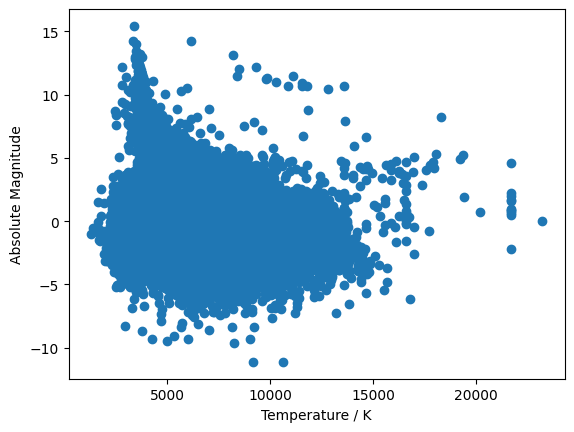

In [52]:
PyPlot.scatter(temperatures, absmags)
PyPlot.xlabel("Temperature / K")
PyPlot.ylabel("Absolute Magnitude");